In [1]:
# Dataset can be found in https://www.kaggle.com/xiaowenlimarketing/international-student-time-management

import pandas as pd

df = pd.read_csv("D:/Personal_Project/rice/test/test_data/time_management/data.csv")
descrip = pd.read_csv("D:/Personal_Project/rice/test/test_data/time_management/descrip.csv")

### Overview

Below proceeding, it is good to have a good idea of what the questionnaires are actually measuring. So let's look at the questions being asked.

In [2]:
descrip

,Order,Questions,Option & scores,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Strong agree,Agree,Neither Agree or Disagree,Disagree,Strong disagree
1,6.0,"You often feel that your life is aimless, with...",1,2,3,4,5
2,7.0,You never have trouble organizing the things y...,5,4,3,2,1
3,8.0,"Once you've started an activity, you persist a...",5,4,3,2,1
4,9.0,Sometimes you feel that the things you have to...,1,2,3,4,5
5,10.0,You will plan your activities from day to day.,5,4,3,2,1
6,11.0,You tend to leave things to the last minute?,1,2,3,4,5
7,12.0,You tend to change rather aimlessly from one a...,1,2,3,4,5
8,13.0,You give up the things that you planning to do...,1,2,3,4,5
9,14.0,You think you do enough with your time.,5,4,3,2,1


The questionnaire is asking about how participants feel about how well they manage their time.

In [3]:
df

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Disagree,...,Agree,Neither,Disagree,Disagree,Neither,Disagree,Disagree,Agree,Neither,Agree
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,Agree,...,Neither,Agree,Neither,Strong Agree,Agree,Agree,Disagree,Agree,Strong Agree,Agree
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,Strong Disagree,...,Neither,Neither,Neither,Neither,Neither,Strong Disagree,Disagree,Strong Agree,Disagree,Neither
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,Agree,...,Disagree,Strong Agree,Disagree,Agree,Agree,Strong Disagree,Disagree,Strong Agree,Disagree,Disagree


###  Encoding

We can use Encoder object to encode the strings into numerical values for computing scoring later. We will also fill the NaN values as "Neither" by passing the argument `default` to the encoder. We will set `neutral` argument to 3 (which is 'Neither') to help us to detect participants that tend to only answer neutrally.

In [4]:
from tickcounter.questionnaire import Encoder

e1 = Encoder({
    "Strong Agree": 5, 
    "Agree": 4, 
    "Neither": 3, 
    "Disagree": 2, 
    "Strong Disagree": 1
}, default=3, neutral=3, name="Agree-ness")
e2 = Encoder(template=e1, inverse=True, name="Disagree-ness")

`e2` will inherit the same encoding rule, default and neutral values with `e1`. `inverse` argument tells the Encoder object to inverse the encoding rule of `e1`, i.e., 'Strong Agree' will now have value of 1, 'Agree' has value 2 and so on.

In [5]:
# The encoding is inverted in e2

e2.encoding

{'Strong Agree': 1,
 'Agree': 2,
 'Neither': 3,
 'Disagree': 4,
 'Strong Disagree': 5}

We will specify how to compute the time management score. We will also label the participants based on whether the participants is above or below average.

In [6]:
from tickcounter.questionnaire import QuartileLabel

l1 = QuartileLabel(q=2, labels=['Below average', 'Above average'], name='Above/Below average')

In [7]:
from tickcounter.questionnaire import Scoring

s1 = Scoring(labeling=l1, encoding={
    e1: ['7', '8', '10', '14', '17'],
    e2: ['6', '9', '11', '12', '13', '15', '16']
}, name="time_management")

In [8]:
QUESTION_COL = s1.columns
QUESTION_COL

['7', '8', '10', '14', '17', '6', '9', '11', '12', '13', '15', '16']

Now lets transform the DataFrame based on the scoring we specified.

In [9]:
df_transformed = s1.transform(df)
df_transformed

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,4.0,...,5.0,3.0,4.0,3.0,4.0,5,5.0,3,4.0,4.0
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,1.0,...,3.0,4.0,4.0,3.0,4.0,5,3.0,2,3.0,2.0
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,4.0,...,4.0,4.0,4.0,2.0,4.0,5,2.0,1,1.0,2.0
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,4.0,...,4.0,2.0,2.0,2.0,3.0,3,3.0,3,4.0,4.0
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,3.0,...,3.0,3.0,2.0,3.0,3.0,3,3.0,4,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,4.0,...,4.0,3.0,2.0,4.0,3.0,4,2.0,2,3.0,4.0
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,2.0,...,3.0,2.0,3.0,1.0,2.0,2,2.0,2,1.0,4.0
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,5.0,...,3.0,3.0,3.0,3.0,3.0,5,2.0,1,4.0,3.0
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,2.0,...,2.0,1.0,2.0,2.0,2.0,5,2.0,1,4.0,2.0


We can also calculate the score and label the score using the Scoring object.

In [10]:
s1.score(df)

0      48.0
1      38.0
2      38.0
3      36.0
4      36.0
       ... 
120    37.0
121    26.0
122    38.0
123    27.0
124    45.0
Name: time_management score, Length: 125, dtype: float64

In [11]:
s1.label(df)

,time_management - Label Above/Below average
0,Above average
1,Above average
2,Above average
3,Below average
4,Below average
...,...
120,Below average
121,Below average
122,Above average
123,Below average


In [12]:
# The label function is equivalent to

score = s1.score(df)
score_mean = score.mean()
label_ss = pd.Series(index=df.index, dtype=str, name=s1.label_col[0])
label_ss[score > score_mean] = 'Above average'
label_ss[score <= score_mean] = 'Below average'
label_ss = pd.DataFrame([label_ss]).T
assert all(label_ss == s1.label(df)) == True

In [13]:
s1.label(df)

,time_management - Label Above/Below average
0,Above average
1,Above average
2,Above average
3,Below average
4,Below average
...,...
120,Below average
121,Below average
122,Above average
123,Below average


Lets put the score and label information to our `df_transformed`.

In [14]:
df_transformed = pd.concat([df_transformed, s1.score(df), s1.label(df)], axis=1)

In [15]:
df_transformed

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,10,11,12,13,14,15,16,17,time_management score,time_management - Label Above/Below average
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,4.0,...,4.0,3.0,4.0,5,5.0,3,4.0,4.0,48.0,Above average
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,1.0,...,4.0,3.0,4.0,5,3.0,2,3.0,2.0,38.0,Above average
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,4.0,...,4.0,2.0,4.0,5,2.0,1,1.0,2.0,38.0,Above average
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,4.0,...,2.0,2.0,3.0,3,3.0,3,4.0,4.0,36.0,Below average
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,3.0,...,2.0,3.0,3.0,3,3.0,4,3.0,4.0,36.0,Below average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,4.0,...,2.0,4.0,3.0,4,2.0,2,3.0,4.0,37.0,Below average
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,2.0,...,3.0,1.0,2.0,2,2.0,2,1.0,4.0,26.0,Below average
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,5.0,...,3.0,3.0,3.0,5,2.0,1,4.0,3.0,38.0,Above average
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,2.0,...,2.0,2.0,2.0,5,2.0,1,4.0,2.0,27.0,Below average


### Data Cleaning

Here we check if there is any unusual responses from the respondents. Below are possible examples of unusual responses:

- Answering neutrally or answering "Neither" most of the time. This could be due to the participant's lack of self-knowledge or awareness on how he/she manages his/her time or participants not even paying attention to the questions. If it is the former case, average score resulted from giving neutral answer to each question does not mean the participant is average in time management, but simply means that the participant does not know how well he/she manages his/her time. If the latter is true, the responses yield absolutely no information on how participant perceive his/her time management.
- Extreme responding, where most answers given are at the extreme ends of the scale, ie. either strongly agree or strongly disagree on something.
- Same or similar answer given to most questions. This could be due to participants not paying attention to the questions.

The first and third cases will be removed from the data as they do not really measure what the questionnaires are supposed to be measuring, which is the participants' perception on how well they manage their time.

To remove those unusual response, we use metrics such as how much answers deviate from neutral response.

#### Removing participants with almost all neutral questions

Since we already specify the neutral value when defining our Encoder object, we can use it to count the number of neutral response for each participant.

In [16]:
total, rule = e1.count_neutral(df, return_rule=True)

Under the hood, `count_neutral` will transform the data first before counting the number of neutral values. By default, `count_neutral` only applies encoding rule to columns where all the unique values have their corresponding encoding rules.

If you want to check that `count_neutral` method really encode the columns the way we desire, you can set `return_rule` argument to `True` to see which column is being encoded and used.

In [17]:
rule

Number                NaN
Age                   NaN
Gender                NaN
Nationality           NaN
Program               NaN
Course                NaN
English               NaN
Academic              NaN
Attendance            NaN
6              Agree-ness
7              Agree-ness
8              Agree-ness
9              Agree-ness
10             Agree-ness
11             Agree-ness
12             Agree-ness
13             Agree-ness
14             Agree-ness
15             Agree-ness
16             Agree-ness
17             Agree-ness
dtype: object

In [18]:
total

0      3
1      4
2      0
3      4
4      8
      ..
120    3
121    2
122    7
123    0
124    1
Length: 125, dtype: int64

We have 12 questions in the questionnaire. Lets see participants that answer neutrally in more than 10 questions.

In [19]:
df[total > 10]

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
10,11,21-25,M,China,PM,Business,60%~70%,>70%,S1,Strong Disagree,...,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither
77,78,18-20,F,OCEAN,PM,Law/Legal studies,<40%,<40%,S4,NaN,...,NaN,NaN,NaN,NaN,NaN,Neither,Neither,Neither,NaN,Strong Agree
87,88,18-20,F,Thailand,FC,Business,60%~70%,NaN,S0,Neither,...,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither
112,113,>36,F,Colombia,IYO,Social Sciences and Humanities,40%~49%,40%~49%,S3,Neither,...,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither


We will remove these data.

In [20]:
mask = df[total > 10]
df = df.drop(mask.index)

In [21]:
df

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Disagree,...,Agree,Neither,Disagree,Disagree,Neither,Disagree,Disagree,Agree,Neither,Agree
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,Agree,...,Neither,Agree,Neither,Strong Agree,Agree,Agree,Disagree,Agree,Strong Agree,Agree
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,Strong Disagree,...,Neither,Neither,Neither,Neither,Neither,Strong Disagree,Disagree,Strong Agree,Disagree,Neither
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,Agree,...,Disagree,Strong Agree,Disagree,Agree,Agree,Strong Disagree,Disagree,Strong Agree,Disagree,Disagree


#### Removing repeated answers to most questions

Here, we look for participants that agree or disagree on almost all questions. Agreeing on almost all questions are known as his is known as the acquiescence bias, where the participants readily agree on what is being asked. These answers may not reflect on the participants' true perception on their time management.

In [22]:
df_agree = e1.transform(df)
agree_ss = (df_agree[QUESTION_COL] > 3).sum(axis=1)
agree_ss

0      5
1      4
2      6
3      4
4      1
      ..
120    3
121    8
122    1
123    5
124    5
Length: 121, dtype: int64

In [23]:
df[agree_ss > 10][QUESTION_COL]

,7,8,10,14,17,6,9,11,12,13,15,16
19,Agree,Strong Agree,Strong Agree,Agree,Agree,Agree,Agree,Strong Agree,Agree,Strong Agree,Agree,Agree
42,Strong Agree,Strong Agree,Strong Agree,Strong Agree,Strong Agree,Strong Agree,Strong Agree,Strong Agree,Agree,Agree,Strong Agree,Strong Agree
43,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree


Here we see that participant 19, 42 and 43 agrees on mostly all of the questions. Here, these participants' data will be removed.

In [24]:
mask = df[agree_ss > 10].index
df = df.drop(mask)
df

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Disagree,...,Agree,Neither,Disagree,Disagree,Neither,Disagree,Disagree,Agree,Neither,Agree
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,Agree,...,Neither,Agree,Neither,Strong Agree,Agree,Agree,Disagree,Agree,Strong Agree,Agree
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,Strong Disagree,...,Neither,Neither,Neither,Neither,Neither,Strong Disagree,Disagree,Strong Agree,Disagree,Neither
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,Agree,...,Disagree,Strong Agree,Disagree,Agree,Agree,Strong Disagree,Disagree,Strong Agree,Disagree,Disagree


In [25]:
df_disagree = e2.transform(df)
disagree_ss = (df_disagree[QUESTION_COL] > 3).sum(axis=1)
disagree_ss

0      4
1      4
2      6
3      4
4      3
      ..
120    6
121    2
122    4
123    7
124    6
Length: 118, dtype: int64

In [26]:
df[disagree_ss > 10][QUESTION_COL]

,7,8,10,14,17,6,9,11,12,13,15,16


### Data Analysis

Now we are ready to analyze our data with our Questionnaire object. 

First we compare the scores for different groups.

In [27]:
from tickcounter.questionnaire import Questionnaire

q1 = Questionnaire(data=df, scoring=s1)

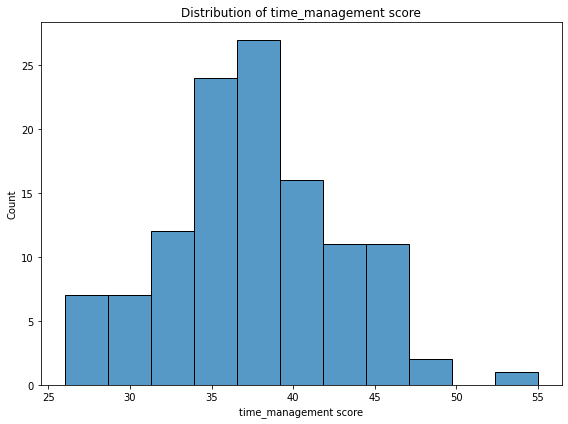

In [28]:
q1.hist_score(figsize=(8, 6))

Under the hood, Seaborn's functions are used for plotting our graph, so you can pass in any related Seaborn keyword arguments to control how graphs are rendered.

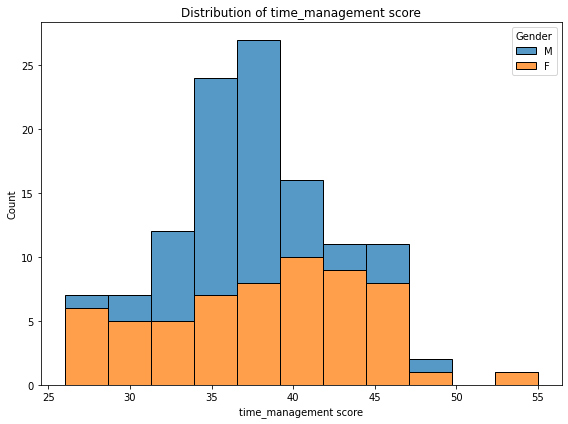

In [29]:
q1.hist_score(hue='Gender', figsize=(8, 6))

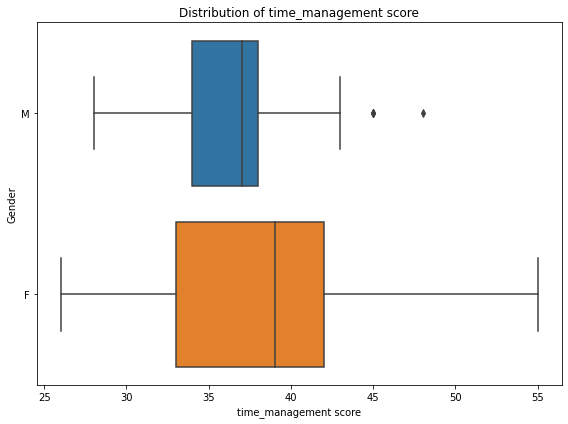

In [30]:
q1.boxplot_score(y='Gender', figsize=(8, 6))

We can also visualize the distribution of each items using plotting methods that end with 'item'.

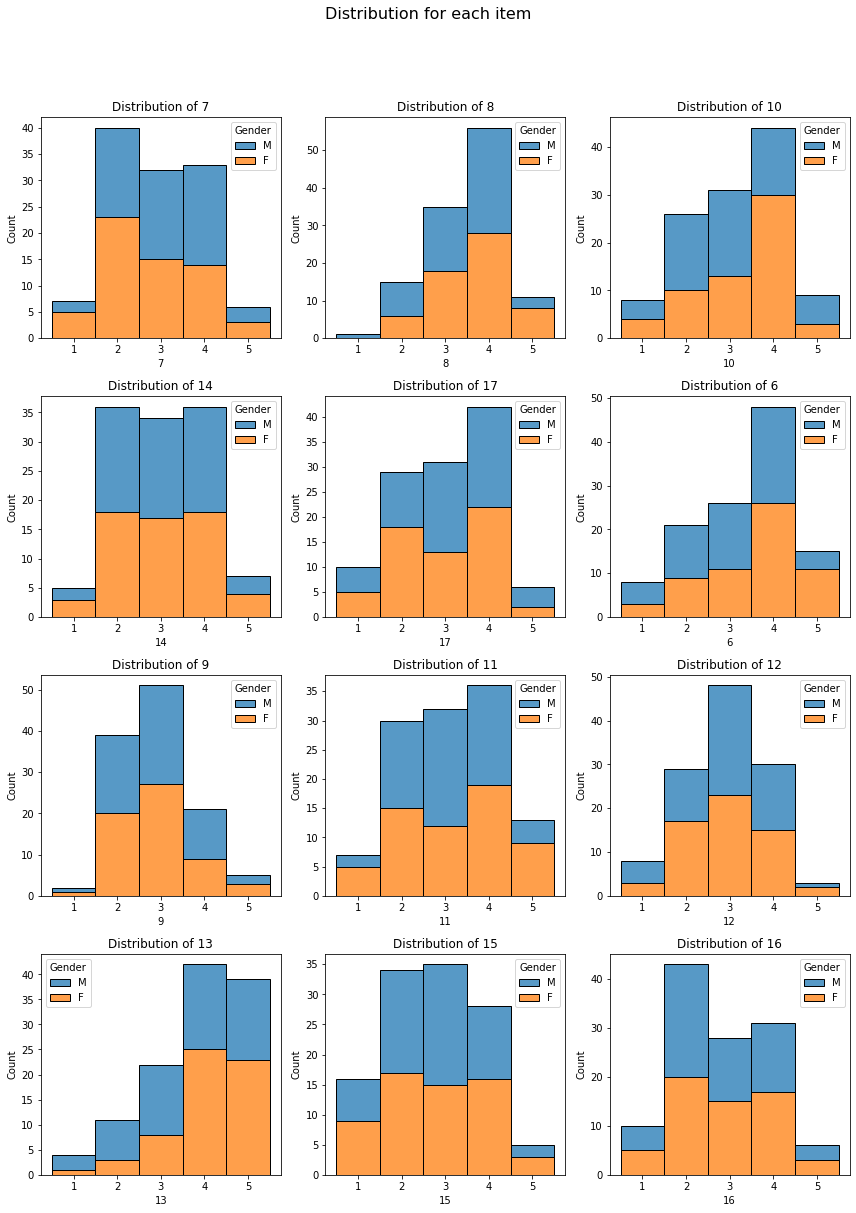

In [31]:
q1.hist_item(hue='Gender', discrete=True, title='Distribution for each item', n_col=3, figsize=(12, 16))

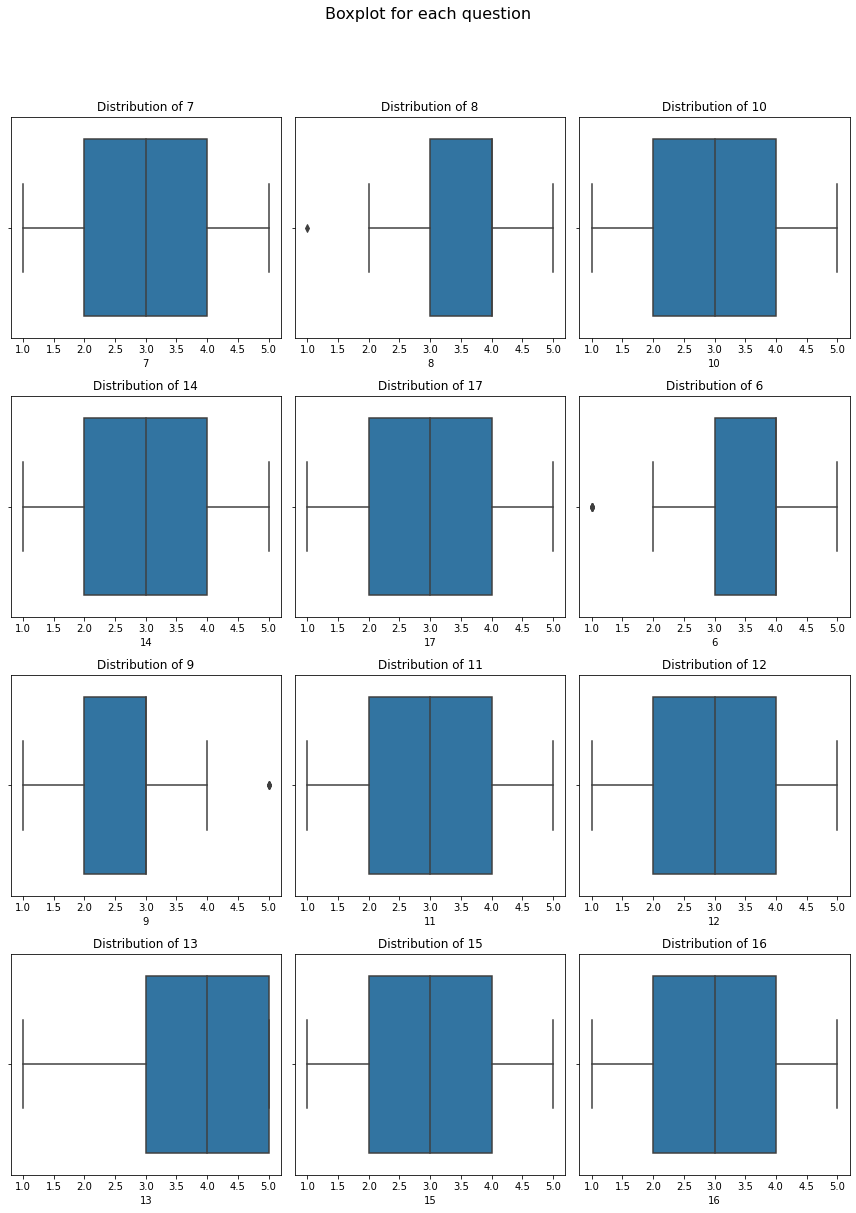

In [32]:
q1.boxplot_item(title='Boxplot for each question', n_col=3, figsize=(12, 16))

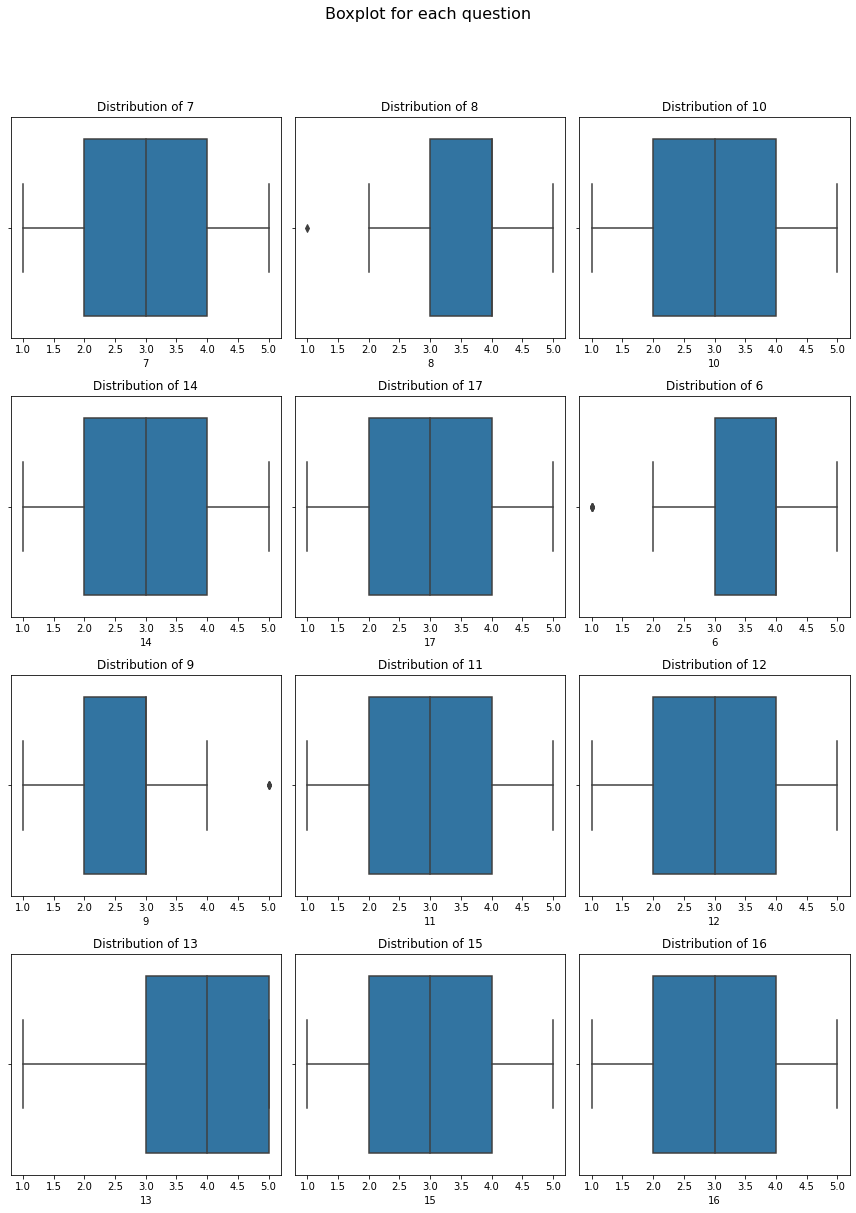

In [33]:
q1.boxplot_item(title='Boxplot for each question', n_col=3, figsize=(12, 16))

Same goes to label

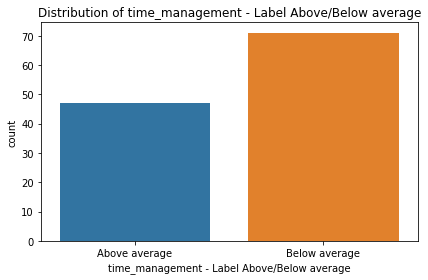

In [34]:
q1.count_label(figsize=(6, 4))

We can also calculate the mean difference of each item across different groups contains in a column. For example, we can see the mean difference of each item between men and women.

In [35]:
q1.diff_item('Gender')

,F - M
7,-0.285632
8,0.236782
10,0.265517
14,-0.001149
17,-0.154023
6,0.412069
9,-0.030460
11,0.096552
12,0.019540
13,0.496552


In [40]:
q1.diff_item(s1.label_col[0])

,Above average - Below average
7,0.374288
8,0.767456
10,0.531615
14,0.650884
17,0.566077
6,1.155229
9,0.381181
11,0.948756
12,0.727899
13,0.699131


We can also performs cross tabulation by passing two categorical column names using `crosstab` method.

In [36]:
q1.crosstab(s1.label_col[0], 'Gender')

Gender,F,M
time_management - Label Above/Below average,,
Above average,34,13
Below average,26,45


Questionnaire object also offers some statistical test methods.

In [37]:
q1.t_test(s1.score_col, 'Gender', 'M', 'F')

(Ttest_indResult(statistic=-1.2095225283054363, pvalue=0.22892143580255575),
 -0.30819610100052414)